In [1]:
from datasets import concatenate_datasets, load_dataset
import matplotlib.pyplot as plt 
import os

d:\Documents\GigaMIDI\midi_loop_detection\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
loop_folder = "D:\\Documents\\GigaMIDI\\gigamidi_non_expressive_loops"

PATHS = []
for file in os.listdir(loop_folder):
    file_path = os.path.join(loop_folder, file)
    PATHS.append(file_path)

print(PATHS)

['D:\\Documents\\GigaMIDI\\gigamidi_non_expressive_loops\\gigamidi_non_expressive_loops_0.csv', 'D:\\Documents\\GigaMIDI\\gigamidi_non_expressive_loops\\gigamidi_non_expressive_loops_1.csv', 'D:\\Documents\\GigaMIDI\\gigamidi_non_expressive_loops\\gigamidi_non_expressive_loops_10.csv', 'D:\\Documents\\GigaMIDI\\gigamidi_non_expressive_loops\\gigamidi_non_expressive_loops_11.csv', 'D:\\Documents\\GigaMIDI\\gigamidi_non_expressive_loops\\gigamidi_non_expressive_loops_12.csv', 'D:\\Documents\\GigaMIDI\\gigamidi_non_expressive_loops\\gigamidi_non_expressive_loops_13.csv', 'D:\\Documents\\GigaMIDI\\gigamidi_non_expressive_loops\\gigamidi_non_expressive_loops_14.csv', 'D:\\Documents\\GigaMIDI\\gigamidi_non_expressive_loops\\gigamidi_non_expressive_loops_15.csv', 'D:\\Documents\\GigaMIDI\\gigamidi_non_expressive_loops\\gigamidi_non_expressive_loops_16.csv', 'D:\\Documents\\GigaMIDI\\gigamidi_non_expressive_loops\\gigamidi_non_expressive_loops_17.csv', 'D:\\Documents\\GigaMIDI\\gigamidi_non_ex

In [3]:
datasets = [load_dataset("csv", data_files=path)['train'] for path in PATHS]
combined_dataset = concatenate_datasets(datasets)
print(combined_dataset)

Dataset({
    features: ['file', 'track_number', 'instrument_type', 'time_signature', 'start', 'end', 'beats', 'density'],
    num_rows: 7108181
})


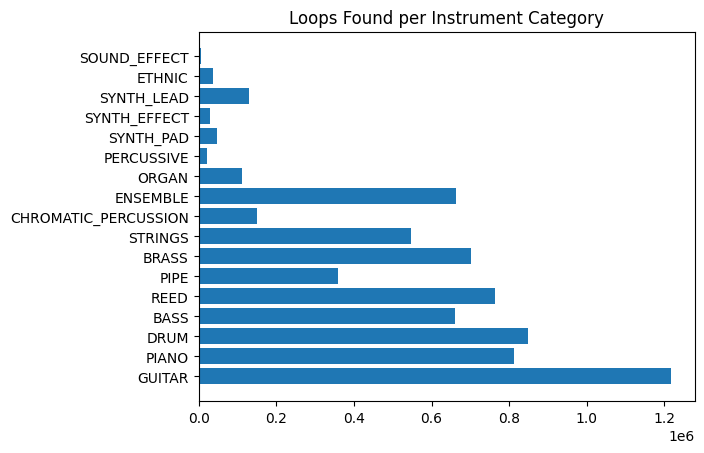

In [4]:
instrument_categories = combined_dataset.unique('instrument_type')
datasets_by_instrument = {}
for instrument in instrument_categories:
    datasets_by_instrument[instrument] = combined_dataset.filter(lambda row: row['instrument_type'] == instrument)

plt.barh(list(datasets_by_instrument.keys()), [len(val) for val in datasets_by_instrument.values()])
plt.title("Loops Found per Instrument Category")
plt.show()

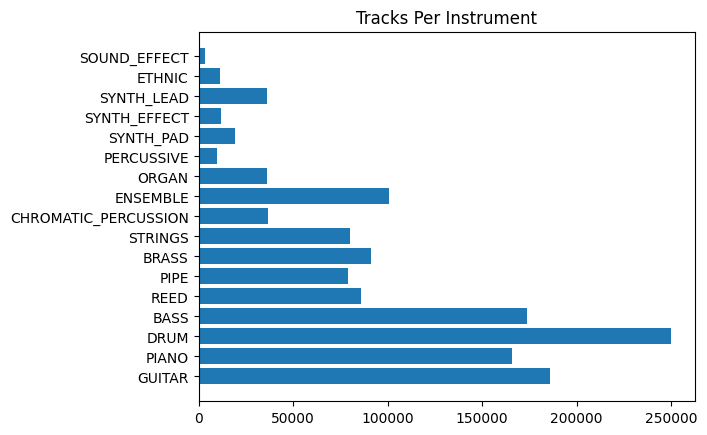

In [5]:
unique_tracks_per_instrument = {}
for instrument,data in datasets_by_instrument.items():
    unique_tracks_per_instrument[instrument] = len(datasets_by_instrument[instrument].unique('file'))

plt.barh(list(unique_tracks_per_instrument.keys()), list(unique_tracks_per_instrument.values()))
plt.title("Tracks Per Instrument")
plt.show()

Found 29 loop lengths


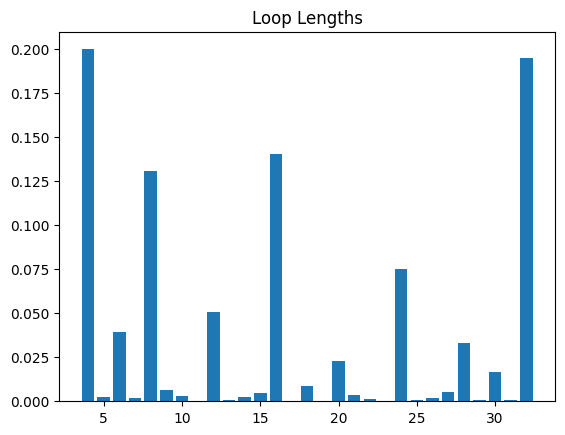

In [6]:
loop_lengths = combined_dataset.unique('beats')
loop_lengths_rounded = [round(length) for length in loop_lengths]
loop_lengths = list(set(loop_lengths_rounded))
print(f"Found {len(loop_lengths)} loop lengths")
loops_by_length = {}
total_loops = len(combined_dataset) * 1.0
for length in loop_lengths:
    loops_by_length[length] = len(combined_dataset.filter(lambda row: row['beats'] == length)) / total_loops

# creating the bar plot
plt.bar(list(loops_by_length.keys()), list(loops_by_length.values()))
plt.title("Loop Lengths")
plt.show()

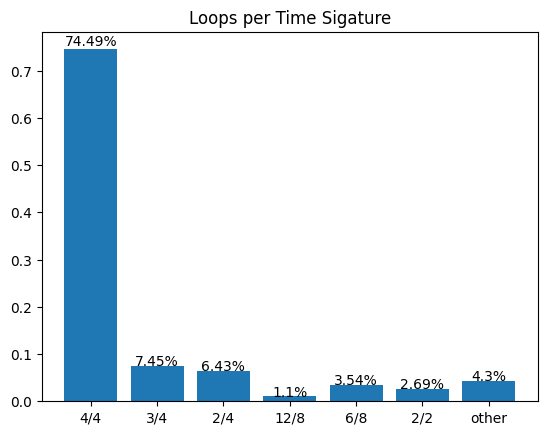

In [7]:
loop_ts = combined_dataset.unique('time_signature')
loop_ts = ['4/4', '3/4', '2/4', '12/8', '6/8', '2/2']
loops_by_ts = {}
total_loops = len(combined_dataset) * 1.0
for ts in loop_ts:
    loops_by_ts[ts] = len(combined_dataset.filter(lambda row: row['time_signature'] == ts)) / total_loops
loops_by_ts['other'] = len(combined_dataset.filter(lambda row: row['time_signature'] not in loop_ts)) / total_loops
graph = plt.bar(list(loops_by_ts.keys()), list(loops_by_ts.values()))
plt.title("Loops per Time Sigature")

vals = list(loops_by_ts.values())
i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
     
    plt.text(x+width/2,
             y+height*1.01,
             str(round(vals[i]*100.0,2))+'%',
             ha='center')
    i += 1

plt.show()

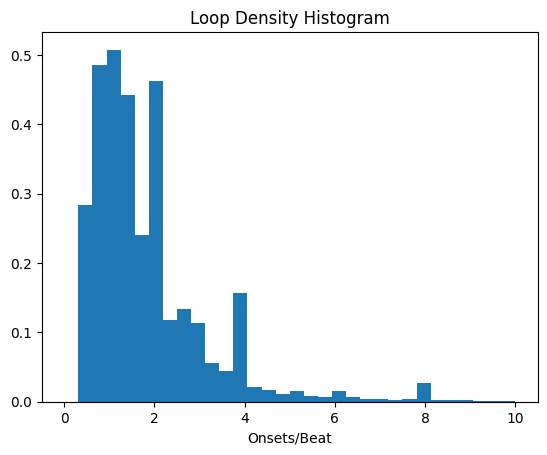

In [8]:
loop_density = combined_dataset['density']
plt.hist(loop_density, bins=32, range=[0.0, 10.0], density=True)
plt.title("Loop Density Histogram")
plt.xlabel("Onsets/Beat")
plt.show()

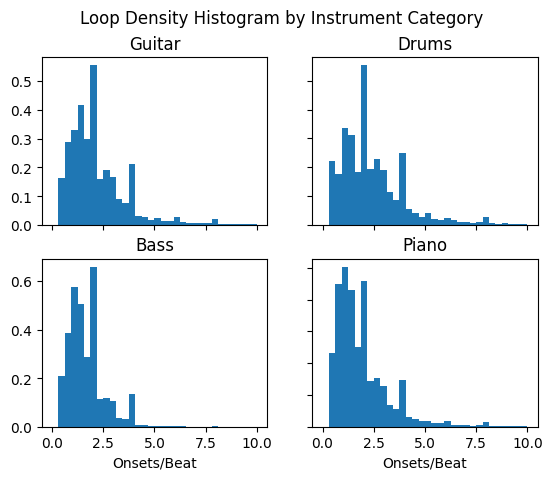

In [9]:
fig, axs = plt.subplots(2, 2)
fig.suptitle('Loop Density Histogram by Instrument Category')
axs[0, 0].hist(datasets_by_instrument['GUITAR']['density'], bins=32, range=[0.0, 10.0], density=True)
axs[0, 0].set_title('Guitar')
axs[0, 1].hist(datasets_by_instrument['DRUM']['density'], bins=32, range=[0.0, 10.0], density=True)
axs[0, 1].set_title('Drums')
axs[1, 0].hist(datasets_by_instrument['BASS']['density'], bins=32, range=[0.0, 10.0], density=True)
axs[1, 0].set_title('Bass')
axs[1, 1].hist(datasets_by_instrument['PIANO']['density'], bins=32, range=[0.0, 10.0], density=True)
axs[1, 1].set_title('Piano')

for ax in axs.flat:
    ax.set(xlabel='Onsets/Beat')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

29


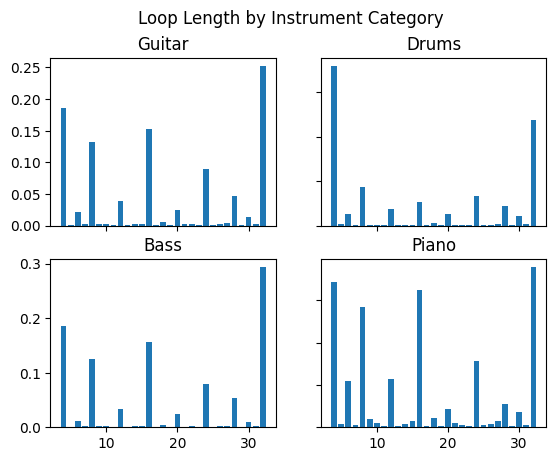

In [10]:
loop_lengths = combined_dataset.unique('beats')
loop_lengths_rounded = list(set([round(length) for length in loop_lengths]))
print(len(loop_lengths_rounded))

instruments_by_loop_lengths = {
    'GUITAR': {},
    'DRUM': {},
    'BASS': {},
    'PIANO': {}
}

for instrument in instruments_by_loop_lengths.keys():
    for length in loop_lengths_rounded:
        instruments_by_loop_lengths[instrument][length] = len(datasets_by_instrument[instrument].filter(lambda row: round(row['beats']) == length)) / (1.0 * len(datasets_by_instrument[instrument]))


fig, axs = plt.subplots(2, 2)
fig.suptitle('Loop Length by Instrument Category')
axs[0, 0].bar(loop_lengths_rounded, instruments_by_loop_lengths['GUITAR'].values())
axs[0, 0].set_title('Guitar')
axs[0, 1].bar(loop_lengths_rounded, instruments_by_loop_lengths['DRUM'].values())
axs[0, 1].set_title('Drums')
axs[1, 0].bar(loop_lengths_rounded, instruments_by_loop_lengths['BASS'].values())
axs[1, 0].set_title('Bass')
axs[1, 1].bar(loop_lengths_rounded, instruments_by_loop_lengths['PIANO'].values())
axs[1, 1].set_title('Piano')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()